# Machine Learning - Assignment 7

This week course focuses on Unsupervising Learning and Dimensionality Reduction. For unsupervised learning, ww use k-means clustering algorithm and for dimensionality reduction we use PCA.

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.io import loadmat
import matplotlib.image as mpimg

## Problem 1: K-means clustering

### Problem 1.1: Implementing K-means clustering

Finding closest centroid

In [43]:
data = loadmat('./data/ex7data2.mat')
X = data["X"]
print(X.shape)

(300, 2)


In [44]:
def findClosestCentroids(X, centroids):
    K = len(centroids)
    idx = np.zeros(len(X))
    for i in range(len(X)):
        dist = np.sum(np.power(X[i] - centroids, 2), axis=1)
        idx[i] = np.argmin(dist)
    return idx

In [45]:
K = 3
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = findClosestCentroids(X, initial_centroids)
print("closest centroid for the first 3 examples: ",idx[:3])

closest centroid for the first 3 examples:  [0. 2. 1.]


Now, we can do the second part of k-means which is computing centroid means

In [86]:
def computeCentroids(X, idx, K):
    centroids = np.zeros((K,X.shape[1]))
    for k in range(K):
        centroids[k] = np.mean(X[idx == k], axis=0)
    return centroids

In [87]:
centroids = computeCentroids(X, idx, K)
print(centroids)

[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


### Problem 1.2: K-means on example dataset

Finally, we can put both our cluster assignment and cluster computation codes together to iterate between them and come up with the min cust function 

In [88]:
def runkMeans(X, initial_centroids, max_iters):
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    for _ in range(max_iters):
        idx = findClosestCentroids(X, centroids)
        centroids= computeCentroids(X, idx, K)
    return idx, centroids

In [100]:
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
max_iters = 10
idx, centroids = runkMeans(X, initial_centroids, max_iters)

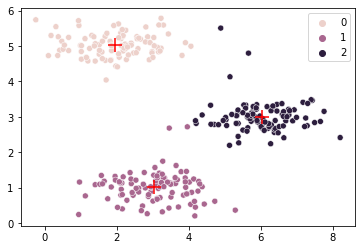

In [105]:
plt.figure()
# plt.scatter(X[idx == 0, 0], X[idx == 0, 1], color='red')
# plt.scatter(X[idx == 1, 0], X[idx == 1, 1], color='green')
# plt.scatter(X[idx == 2, 0], X[idx == 2, 1], color='blue')
sns.scatterplot(x=X[:,0],y=X[:,1], hue = idx.astype(int))
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker="+", s=200)
plt.show()

### Problem 1.3: Random initialization

The problem with the minimizatin of the cost funciton above, is that we selected a prefered initial centroid value. Because of this, we might be stuk in a local minimum. This is why we must use random init to randomize the selection of our initial centroids.

In [109]:
def kMeansInitCentroids(X, K):
    rng = np.random.RandomState(0)
    idx = np.arange(X.shape[0])
    rng.shuffle(idx)
    centroids = X[idx[:K]]
    return centroids

### Problem 1.4: Image compression with K-means

In this exercise, we will apply K-means to image compression. In a straightforward 24-bit color representation of an image, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding. Our image contains thousands of colors, and in this part of the exercise, we will reduce the number of colors to 16 colors. By making this reduction, it is possible to represent (compress) the photo in an efficient way. Specifically, we only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities). 

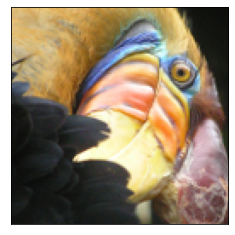

In [143]:
plt.figure()
plt.imshow(mpimg.imread('./data/bird_small.png'))
plt.xticks([])
plt.yticks([])
plt.show()

In [117]:
A = mpimg.imread('./data/bird_small.png')
A = A/225
print(A.shape)

(128, 128, 3)


In [144]:
X = A.reshape(A.shape[0] * A.shape[1], A.shape[2])
X.shape

(16384, 3)

In [124]:
K = 16
max_iters = 10
initial_centroids = kMeansInitCentroids(X, K)
idx, centroids = runkMeans(X, initial_centroids, max_iters)

In [127]:
X_recovered = centroids[findClosestCentroids(X, centroids).astype(int)]
X_recovered = X_recovered.reshape(A.shape[0], A.shape[1], A.shape[2])
print(X_recovered.shape)

(128, 128, 3)


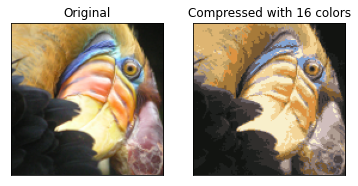

In [135]:
plt.figure()
plt.subplot(121)
plt.imshow(A*225)
plt.xticks([])
plt.yticks([])
plt.title("Original")
plt.subplot(122)
plt.imshow(X_recovered*225)
plt.xticks([])
plt.yticks([])
plt.title("Compressed with 16 colors")
plt.show()

## Problem 2: PCA

### Problem 2.1: Example dataset

In [147]:
data2 = loadmat('./data/ex7data1.mat')
X = data2["X"]
print(X.shape)

(50, 2)


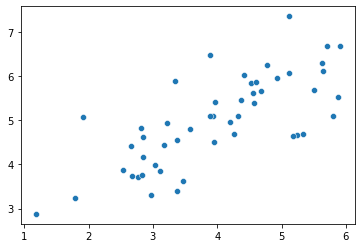

In [153]:
plt.figure()
sns.scatterplot(x=X[:,0],y=X[:,1])
plt.show()

### Problem 2.2: Implementing PCA

First we want to do normalization

In [169]:
def featureNormalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, ddof=1, axis=0)
    X_norm = (X - mean) / std
    return X_norm, mean, std

Then, we can define a function for PCA that will output U and S so we can then get z

In [170]:
def pca(X):
    sigma = np.dot(X.T, X) / X.shape[0]
    U, S, _ = np.linalg.svd(sigma)
    return U, S

In [171]:
X_norm, mean, std = featureNormalize(X)
U, S = pca(X_norm)

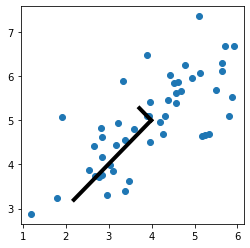

In [177]:
plt.figure(figsize=(4,4))
plt.scatter(X[:, 0], X[:, 1])
plt.plot([mean[0], mean[0] + 1.5 * S[0] * U[0, 0]],
         [mean[1], mean[1] + 1.5 * S[0] * U[1, 0]],
         color="black", linewidth=4)
plt.plot([mean[0], mean[0] + 1.5 * S[1] * U[0, 1]],
         [mean[1], mean[1] + 1.5 * S[1] * U[1, 1]],
         color="black", linewidth=4)
plt.show()

Now that we know our PCA's output outputs the correct eigenvalue, we can do dimensionality red

### Problem 2.3: Dimensionality reduction with PCA

In [198]:
def projectData(X, U, K):
    Ureduce = U[:, :K] #from n-dim (2D) to K-dim (1D)
    z = np.dot(X, Ureduce)
    return z

In [199]:
K = 1
z = projectData(X_norm, U, K)
print('Projection of the first example:', z[0])

Projection of the first example: [1.48127391]


We can do it backwards and "reconstruct" or X with the optimal fitted line from our PCA function

In [215]:
def recoverData(z, U, K):
    Ureduce = U[:, :K]
    X_rec = np.dot(z, Ureduce.T)
    return X_rec

In [218]:
X_rec  = recoverData(z, U, K)
print('Approximation of the first example:', X_rec[0,:])

Approximation of the first example: [-1.04741883 -1.04741883]


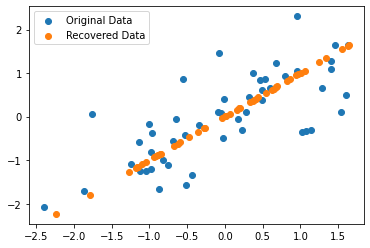

In [235]:
plt.figure()
plt.scatter(X_norm[:, 0], X_norm[:, 1], label = "Original Data")
plt.scatter(X_rec[:, 0], X_rec[:, 1], label = "Recovered Data")
plt.legend()
plt.show()

### Problem 2.4: Face image Dataset

In [238]:
data3 = loadmat('./data/ex7faces.mat')
X = data3["X"]
print(X.shape)

(5000, 1024)


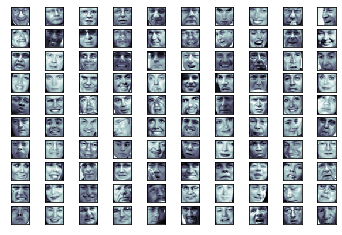

In [252]:
plt.figure()
for i in range (100):
    plt.subplot(10,10,i+1)
    plt.imshow(X[i,:].reshape((32, 32)).T,
               cmap=plt.cm.bone, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
plt.show()

Now, lets do PCA for faces and do a dimensionality reduction from 1024-dim to 100-dim

In [256]:
X_norm, mean, std = featureNormalize(X)
U, S = pca(X_norm)

(1024, 1024)

Visualize the first 36 eigenvectors

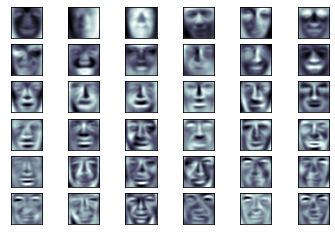

In [255]:
plt.figure()
for i in range (36):
    plt.subplot(6,6,i+1)
    plt.imshow(U[:,i].reshape((32, 32)).T,
               cmap=plt.cm.bone, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [260]:
K = 100
z = projectData(X_norm, U, K)
print('The projected data z has a size of:', z.shape)

The projected data z has a size of: (5000, 100)


In [264]:
X_rec  = recoverData(z, U, K)

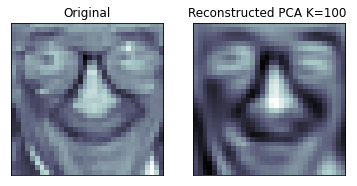

In [267]:
plt.figure()
plt.subplot(121)
plt.imshow(X_norm[0,:].reshape((32, 32)).T,
               cmap=plt.cm.bone, interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title("Original")
plt.subplot(122)
plt.imshow(X_rec[0,:].reshape((32, 32)).T,
               cmap=plt.cm.bone, interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title("Reconstructed PCA K=100 ")
plt.show()

## Problem 2.5: PCA for Viz

Load the same data from the Small bird problem

In [272]:
A = mpimg.imread('./data/bird_small.png')
A = A/225
print(A.shape)

(128, 128, 3)


In [273]:
X = A.reshape(A.shape[0] * A.shape[1], -1)
print(X.shape)

(16384, 3)


In [300]:
K = 16
max_iters = 10
initial_centroids = kMeansInitCentroids(X, K)
idx, centroids = runkMeans(X, initial_centroids, max_iters)

Now, instead of k=16, we setup k=2 so we can plot in 2D

In [301]:
K = 2
X_norm, mu, sigma = featureNormalize(X)
U, S = pca(X_norm)
z = projectData(X_norm, U, K)
print(z.shape)

(16384, 2)


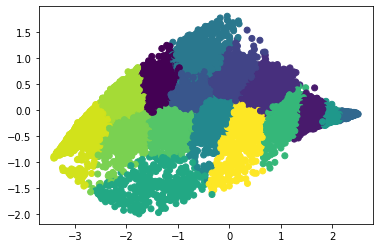

In [302]:
plt.figure()
plt.scatter(z[:, 0], z[:, 1], c=idx)
plt.show()